In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import r2_score
import numpy as np

from sklearn.preprocessing import StandardScaler
from scipy import stats
import plotly.graph_objects as go
import plotly.express as px  # For easier rendering
import plotly.io as pio
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

In [2]:
df = pd.read_csv("GOOG.csv")
df

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,GOOG,2016-06-14 00:00:00+00:00,718.27,800.0000,713.1200,716.480,1306065,718.27,722.4700,713.1200,716.480,1306065,0,1
1,GOOG,2016-06-15 00:00:00+00:00,718.92,900.0000,717.3100,719.000,1214517,718.92,722.9800,717.3100,719.000,1214517,0,1
2,GOOG,2016-06-16 00:00:00+00:00,710.36,750.0000,703.2600,714.910,1982471,710.36,716.6500,703.2600,714.910,1982471,0,1
3,GOOG,2016-06-17 00:00:00+00:00,691.72,700.0000,688.4515,708.650,3402357,691.72,708.8200,688.4515,708.650,3402357,0,1
4,GOOG,2016-06-20 00:00:00+00:00,693.71,702.4800,693.4100,789.000,2082538,693.71,702.4800,693.4100,698.770,2082538,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1242,GOOG,2021-05-20 00:00:00+00:00,2356.09,2360.3400,2321.0900,2328.040,1191593,2356.09,2360.3400,2321.0900,2328.040,1191593,0,1
1243,GOOG,2021-05-21 00:00:00+00:00,2345.10,2368.9999,2342.3700,2365.990,1141632,2345.10,2368.9999,2342.3700,2365.990,1141632,0,1
1244,GOOG,2021-05-24 00:00:00+00:00,2406.67,2418.4800,2360.1100,2367.000,1062189,2406.67,2418.4800,2360.1100,2367.000,1062189,0,1
1245,GOOG,2021-05-25 00:00:00+00:00,2409.07,2432.8900,2402.9900,2420.000,941928,2409.07,2432.8900,2402.9900,2420.000,941928,0,1


In [3]:
df['date'] = pd.to_datetime(df['date']).dt.date
df

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,GOOG,2016-06-14,718.27,800.0000,713.1200,716.480,1306065,718.27,722.4700,713.1200,716.480,1306065,0,1
1,GOOG,2016-06-15,718.92,900.0000,717.3100,719.000,1214517,718.92,722.9800,717.3100,719.000,1214517,0,1
2,GOOG,2016-06-16,710.36,750.0000,703.2600,714.910,1982471,710.36,716.6500,703.2600,714.910,1982471,0,1
3,GOOG,2016-06-17,691.72,700.0000,688.4515,708.650,3402357,691.72,708.8200,688.4515,708.650,3402357,0,1
4,GOOG,2016-06-20,693.71,702.4800,693.4100,789.000,2082538,693.71,702.4800,693.4100,698.770,2082538,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1242,GOOG,2021-05-20,2356.09,2360.3400,2321.0900,2328.040,1191593,2356.09,2360.3400,2321.0900,2328.040,1191593,0,1
1243,GOOG,2021-05-21,2345.10,2368.9999,2342.3700,2365.990,1141632,2345.10,2368.9999,2342.3700,2365.990,1141632,0,1
1244,GOOG,2021-05-24,2406.67,2418.4800,2360.1100,2367.000,1062189,2406.67,2418.4800,2360.1100,2367.000,1062189,0,1
1245,GOOG,2021-05-25,2409.07,2432.8900,2402.9900,2420.000,941928,2409.07,2432.8900,2402.9900,2420.000,941928,0,1


In [4]:
df.drop(columns=['symbol', 'adjClose', 'adjHigh', 'adjLow', 'adjOpen', 'adjVolume', 'divCash', 'splitFactor'], axis=1,inplace=True)
df


,date,close,high,low,open,volume
0,2016-06-14,718.27,800.0000,713.1200,716.480,1306065
1,2016-06-15,718.92,900.0000,717.3100,719.000,1214517
2,2016-06-16,710.36,750.0000,703.2600,714.910,1982471
3,2016-06-17,691.72,700.0000,688.4515,708.650,3402357
4,2016-06-20,693.71,702.4800,693.4100,789.000,2082538
...,...,...,...,...,...,...
1242,2021-05-20,2356.09,2360.3400,2321.0900,2328.040,1191593
1243,2021-05-21,2345.10,2368.9999,2342.3700,2365.990,1141632
1244,2021-05-24,2406.67,2418.4800,2360.1100,2367.000,1062189
1245,2021-05-25,2409.07,2432.8900,2402.9900,2420.000,941928


In [5]:
df.duplicated().values.any()

False

In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1247 entries, 0 to 1246
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    1247 non-null   object 
 1   close   1247 non-null   float64
 2   high    1239 non-null   float64
 3   low     1237 non-null   float64
 4   open    1239 non-null   float64
 5   volume  1247 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 58.6+ KB


In [7]:
df.isnull().sum()

date       0
close      0
high       8
low       10
open       8
volume     0
dtype: int64

In [8]:
imputer = SimpleImputer(missing_values=np.nan , strategy='median')
columns_to_impute = ['high', 'low','open']

df[columns_to_impute] = imputer.fit_transform(df[columns_to_impute])

df

,date,close,high,low,open,volume
0,2016-06-14,718.27,800.0000,713.1200,716.480,1306065
1,2016-06-15,718.92,900.0000,717.3100,719.000,1214517
2,2016-06-16,710.36,750.0000,703.2600,714.910,1982471
3,2016-06-17,691.72,700.0000,688.4515,708.650,3402357
4,2016-06-20,693.71,702.4800,693.4100,789.000,2082538
...,...,...,...,...,...,...
1242,2021-05-20,2356.09,2360.3400,2321.0900,2328.040,1191593
1243,2021-05-21,2345.10,2368.9999,2342.3700,2365.990,1141632
1244,2021-05-24,2406.67,2418.4800,2360.1100,2367.000,1062189
1245,2021-05-25,2409.07,2432.8900,2402.9900,2420.000,941928


In [9]:
df.isnull().sum()

date      0
close     0
high      0
low       0
open      0
volume    0
dtype: int64

In [10]:
df.describe()

,close,high,low,open,volume
count,1247.000000,1247.000000,1247.000000,1247.000000,1.247000e+03
mean,1205.396528,1219.074939,1196.466779,1206.751147,1.604924e+06
std,366.846916,369.393718,359.764563,364.214064,6.976014e+05
min,668.260000,672.300000,663.284000,612.000000,3.467530e+05
25%,957.580000,973.135000,960.350000,968.105000,1.174306e+06
50%,1129.990000,1143.000000,1117.830000,1131.070000,1.415473e+06
75%,1350.690000,1364.085000,1342.725000,1350.520000,1.815700e+06
max,2433.530000,2452.378000,2412.515000,2420.000000,6.207027e+06


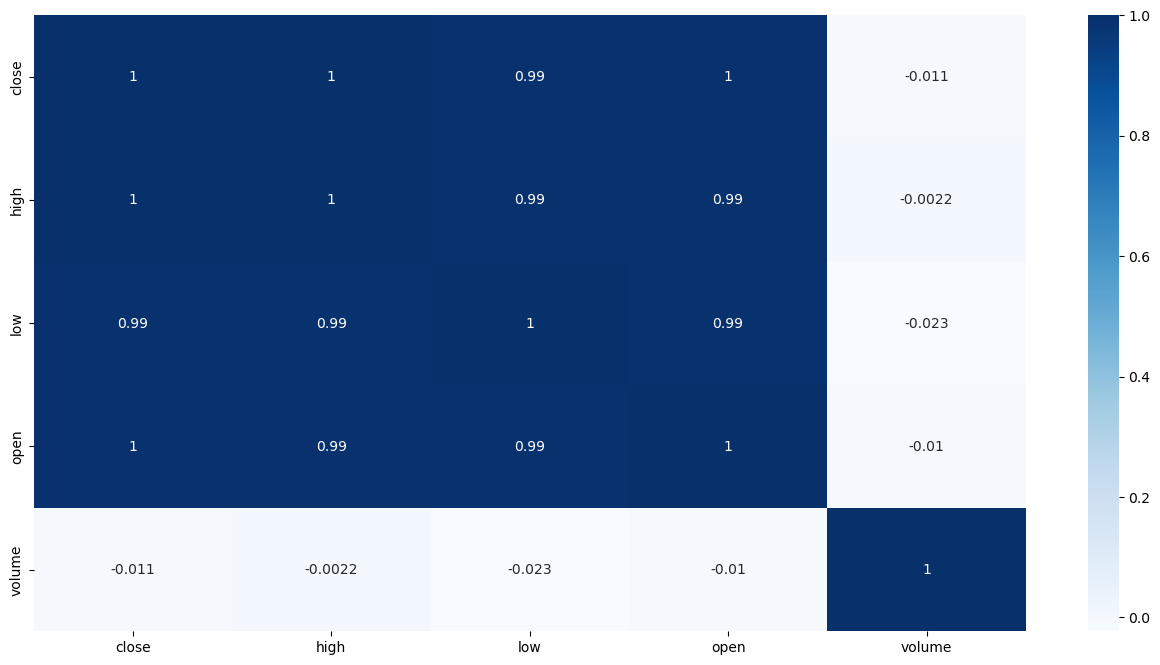

In [11]:
numeric_df = df.select_dtypes(include=['number'])
correlations = numeric_df.corr()
plt.figure(figsize=(16,8))
sns.heatmap(numeric_df.corr(), cmap="Blues", annot=True)
plt.show()

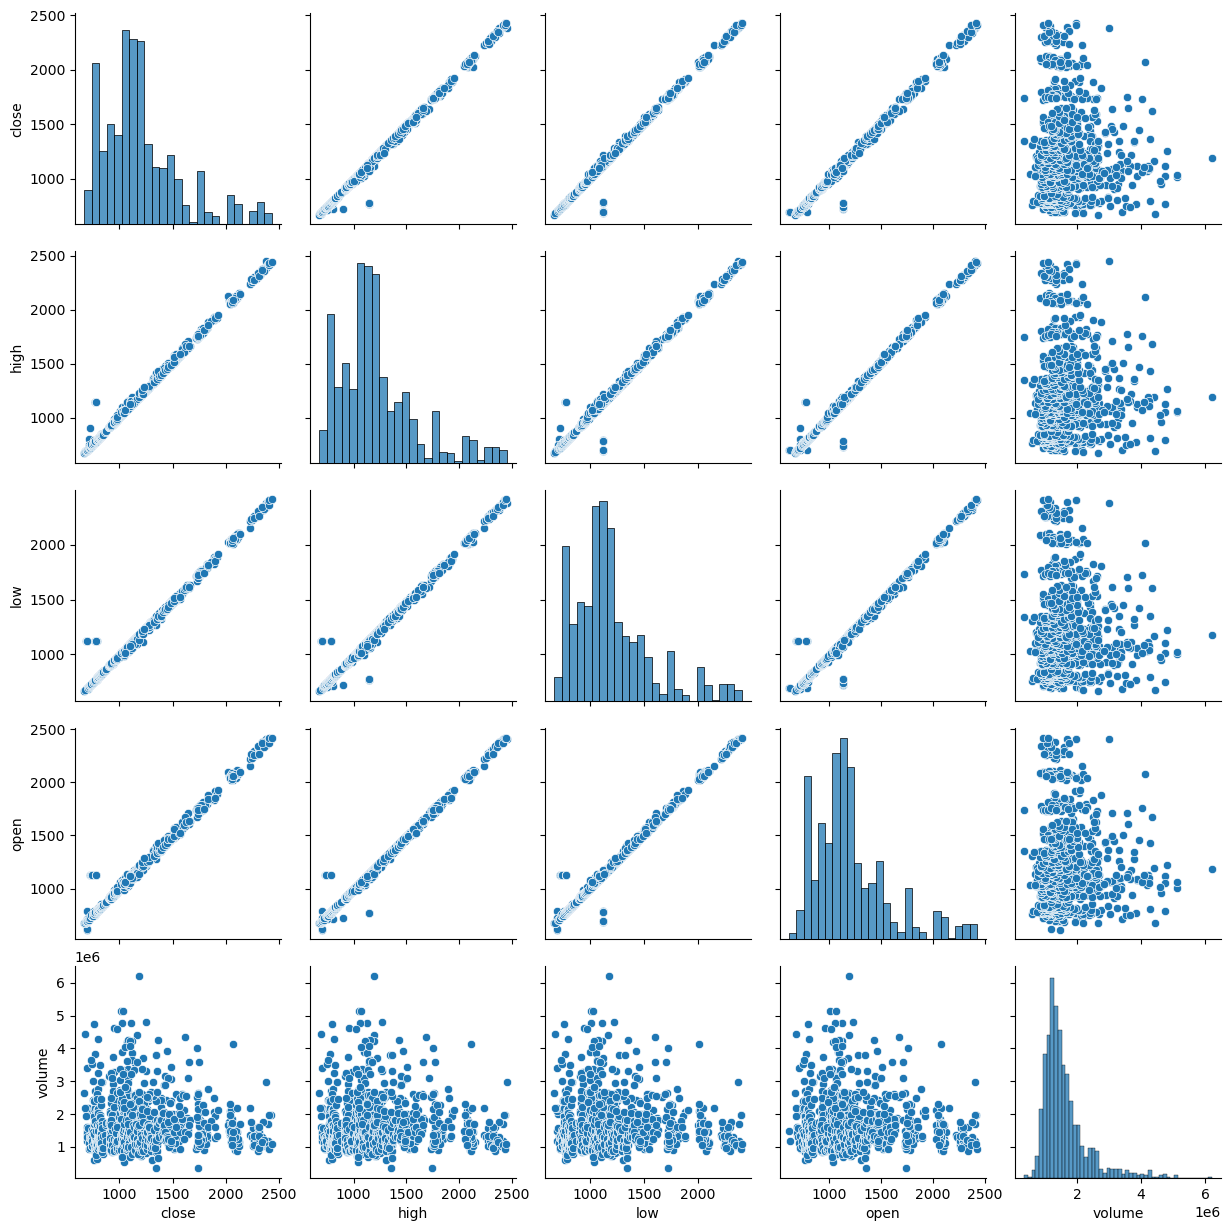

In [12]:
sns.pairplot(df)


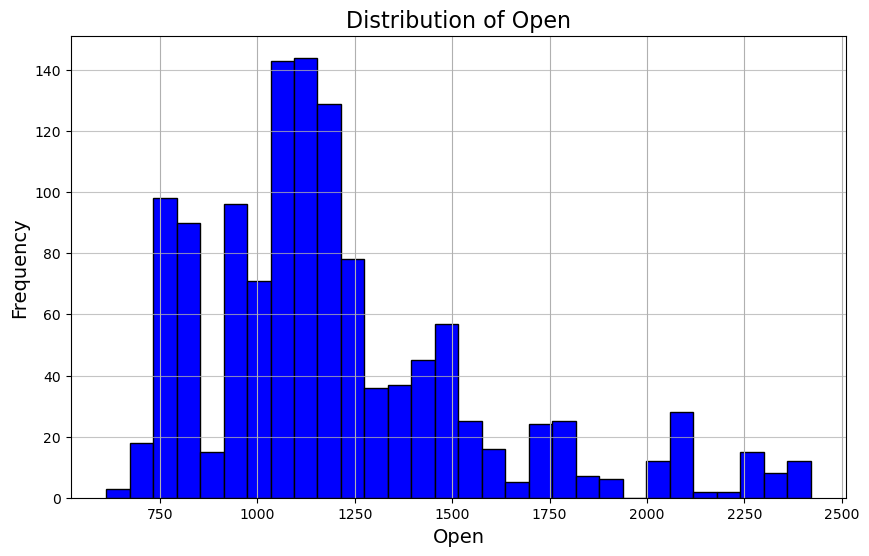

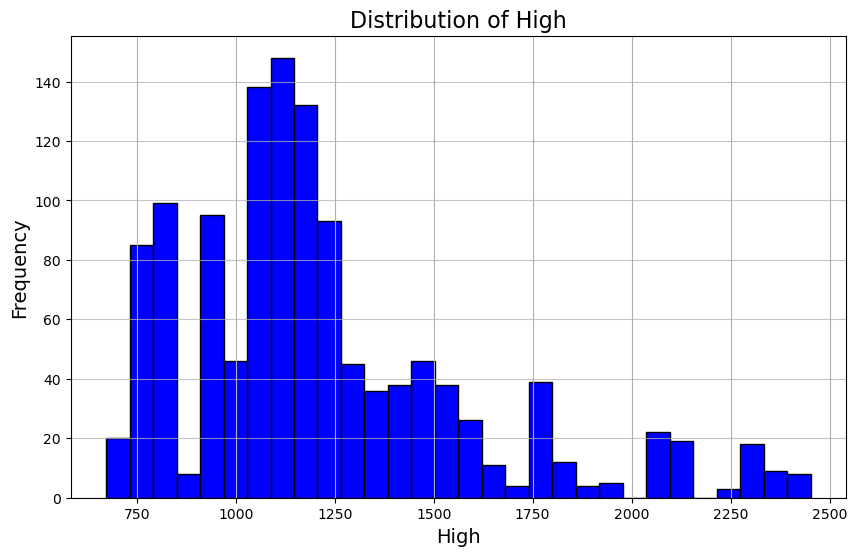

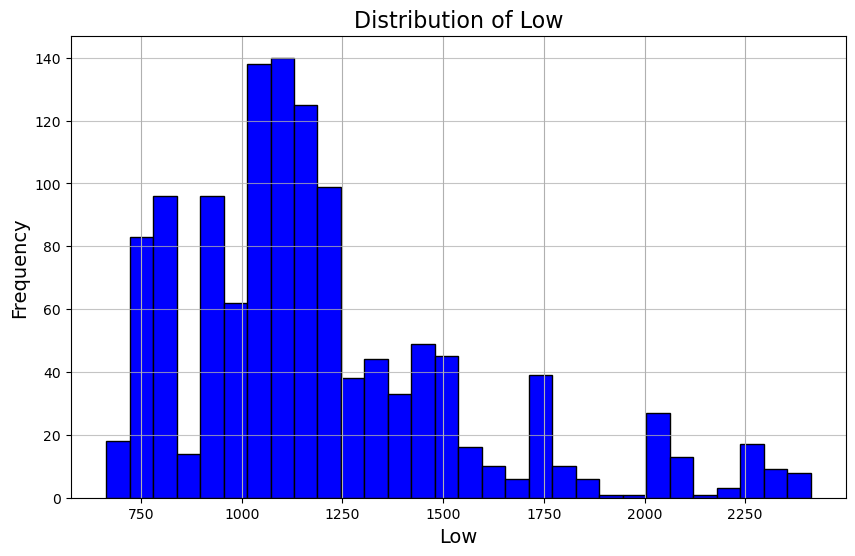

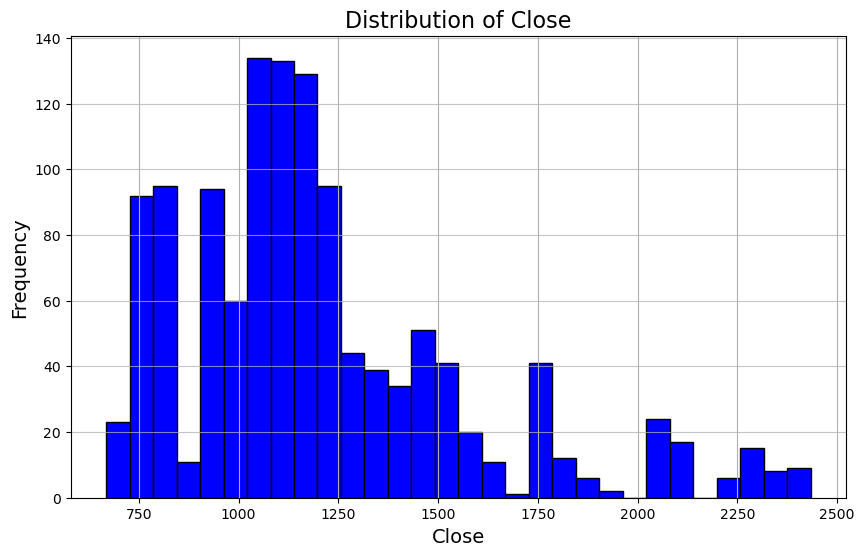

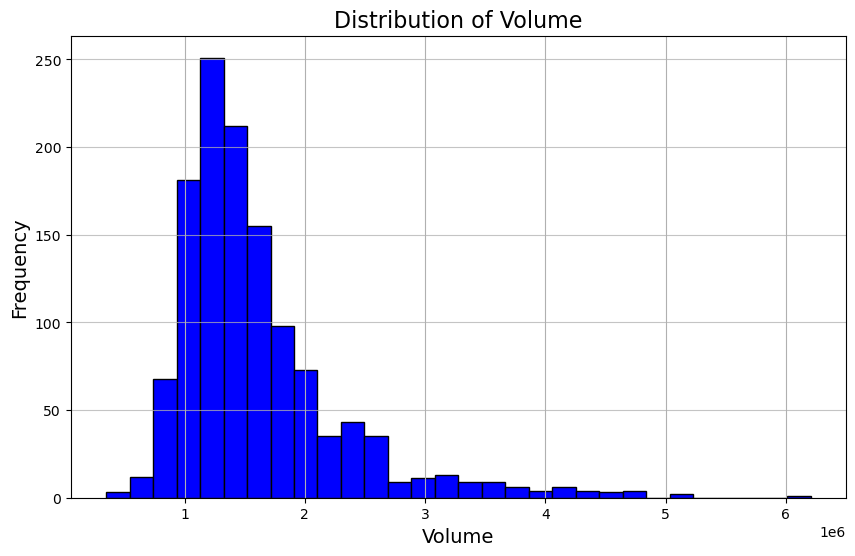

In [13]:
columns_to_plot = ['open', 'high', 'low', 'close', 'volume']
for column in columns_to_plot:
    plt.figure(figsize=(10, 6))
    df[column].hist(bins=30, color='blue', edgecolor='black')
    plt.title(f'Distribution of {column.capitalize()}', fontsize=16)
    plt.xlabel(column.capitalize(), fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.grid(axis='y', alpha=0.75)
    plt.show()

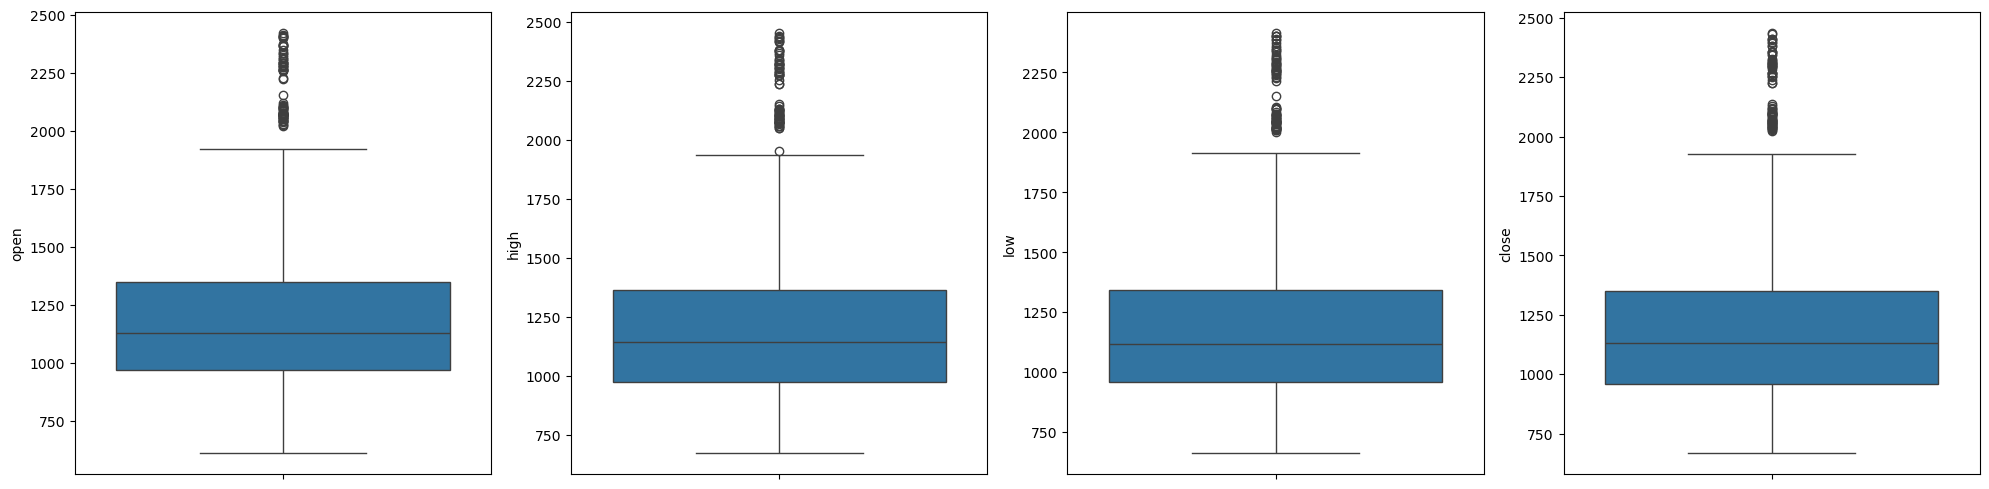

In [14]:
f, axes = plt.subplots(1, 4, figsize=(20,5))
sns.boxplot(y='open', data=df, ax=axes[0])
sns.boxplot(y='high', data=df, ax=axes[1])
sns.boxplot(y='low', data=df, ax=axes[2])
sns.boxplot(y='close', data=df, ax=axes[3])
plt.tight_layout()
plt.show()

In [15]:
scaler = StandardScaler()


In [16]:
scaled_data = scaler.fit_transform(df.select_dtypes(include=['number']))

scaled_df = pd.DataFrame(scaled_data, columns=df.select_dtypes(include=['number']).columns)

df[df.select_dtypes(include=['number']).columns] = scaled_df

In [17]:
df.head()

,date,close,high,low,open,volume
0,2016-06-14,-1.328407,-1.134949,-1.344048,-1.346647,-0.428581
1,2016-06-15,-1.326634,-0.864127,-1.332396,-1.339725,-0.559866
2,2016-06-16,-1.349978,-1.270360,-1.371465,-1.350960,0.541425
3,2016-06-17,-1.400809,-1.405772,-1.412644,-1.368154,2.577625
4,2016-06-20,-1.395383,-1.399055,-1.398855,-1.147454,0.684927


In [18]:
figure = go.Figure(data=[go.Candlestick(x=df["date"],
                                        open=df["open"], high=df["high"],
                                        low=df["low"], close=df["close"])])

figure.update_layout(title="Google Stock Price Analysis after scalling", xaxis_rangeslider_visible=False)
figure.show()

In [19]:
X=df[['open','high','low','volume']].values
Y=df['close'].values

In [20]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

lasso = Lasso(alpha=0.1)  

lasso.fit(x_train, y_train)

y_predict = lasso.predict(x_test)

In [21]:
from sklearn.tree import DecisionTreeRegressor
reg_tree = DecisionTreeRegressor(random_state=42, max_depth=5) 


reg_tree.fit(x_train, y_train)


y_predict_tree = reg_tree.predict(x_test)

In [30]:
from sklearn.metrics import mean_squared_error , mean_absolute_error,r2_score
import math
mse_tree = mean_squared_error(y_test , y_predict_tree)
mae_tree = mean_absolute_error(y_test , y_predict_tree)
acc_tree = r2_score(y_test , y_predict_tree)
print(f"Mean Square Error of Decision tree: {round(mse_tree , 2)}")
print(f"Mean Error of Decision tree: {round(mae_tree , 2)}")
print(f"R2 of Decision tree: {round(acc_tree , 4)*100}%")

Mean Square Error of Decision tree: 0.0
Mean Error of Decision tree: 0.04
R2 of Decision tree: 99.75%


In [31]:
from sklearn.metrics import mean_squared_error , mean_absolute_error,r2_score
import math
mse = mean_squared_error(y_test , y_predict)
mae = mean_absolute_error(y_test , y_predict)
acc = r2_score(y_test , y_predict)
print(f"Mean Square Error of Lasso: {round(mse , 2)}")
print(f"Mean Error of Lasso: {round(mae , 2)}")
print(f"R2 of Lasso: {round(acc , 4)*100}%")

Mean Square Error of Lasso: 0.02
Mean Error of Lasso: 0.09
R2 of Lasso: 98.21%


In [54]:
from sklearn.metrics import explained_variance_score

evs_lasso = explained_variance_score(y_test, y_predict)
evs_tree = explained_variance_score(y_test, y_predict_tree)

evs_lasso, evs_tree


(0.982171255308805, 0.9975585516331882)

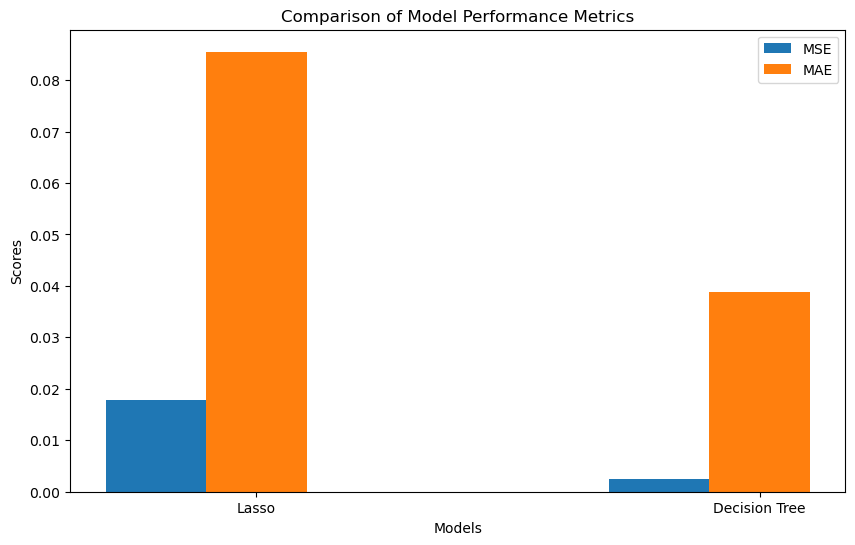

In [36]:
models = ['Lasso', 'Decision Tree']
mse_values = [mse, mse_tree]
mae_values = [mae, mae_tree]

x = np.arange(len(models))  
width = 0.2  

fig, ax = plt.subplots(figsize=(10, 6))

rects1 = ax.bar(x - width, mse_values, width, label='MSE')
rects2 = ax.bar(x, mae_values, width, label='MAE')

ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Model Performance Metrics')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

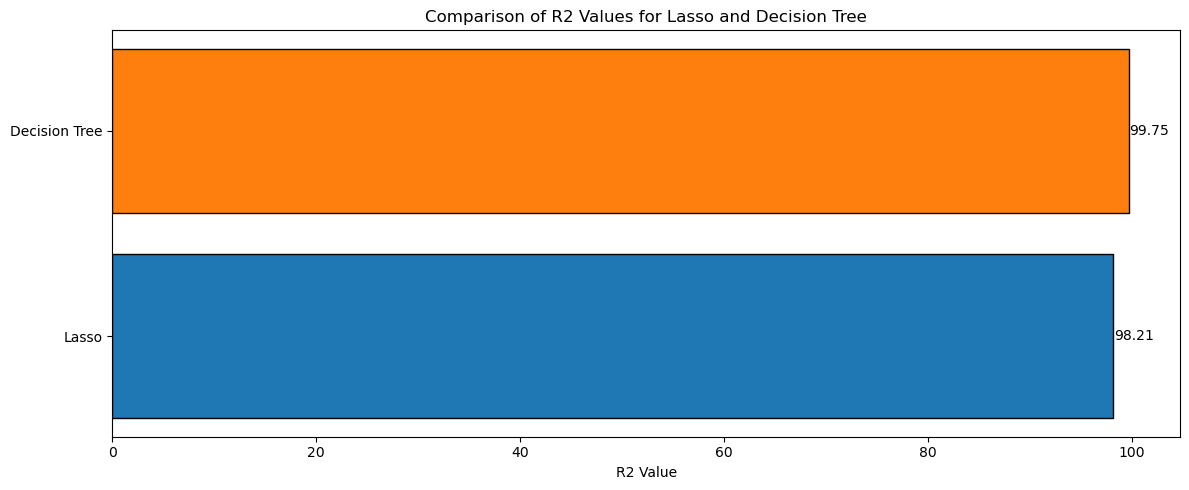

In [45]:
models = ['Lasso', 'Decision Tree']
r2_values = [acc*100, acc_tree*100]

plt.figure(figsize=(12, 5))
plt.barh(models, r2_values, color=['#1f77b4', '#ff7f0e'], edgecolor='black')

plt.xlabel('R2 Value')
plt.title('Comparison of R2 Values for Lasso and Decision Tree')

for index, value in enumerate(r2_values):
    plt.text(value + 0.02, index, f'{value:.2f}', va='center')

# Show the plot
plt.tight_layout()
plt.show()

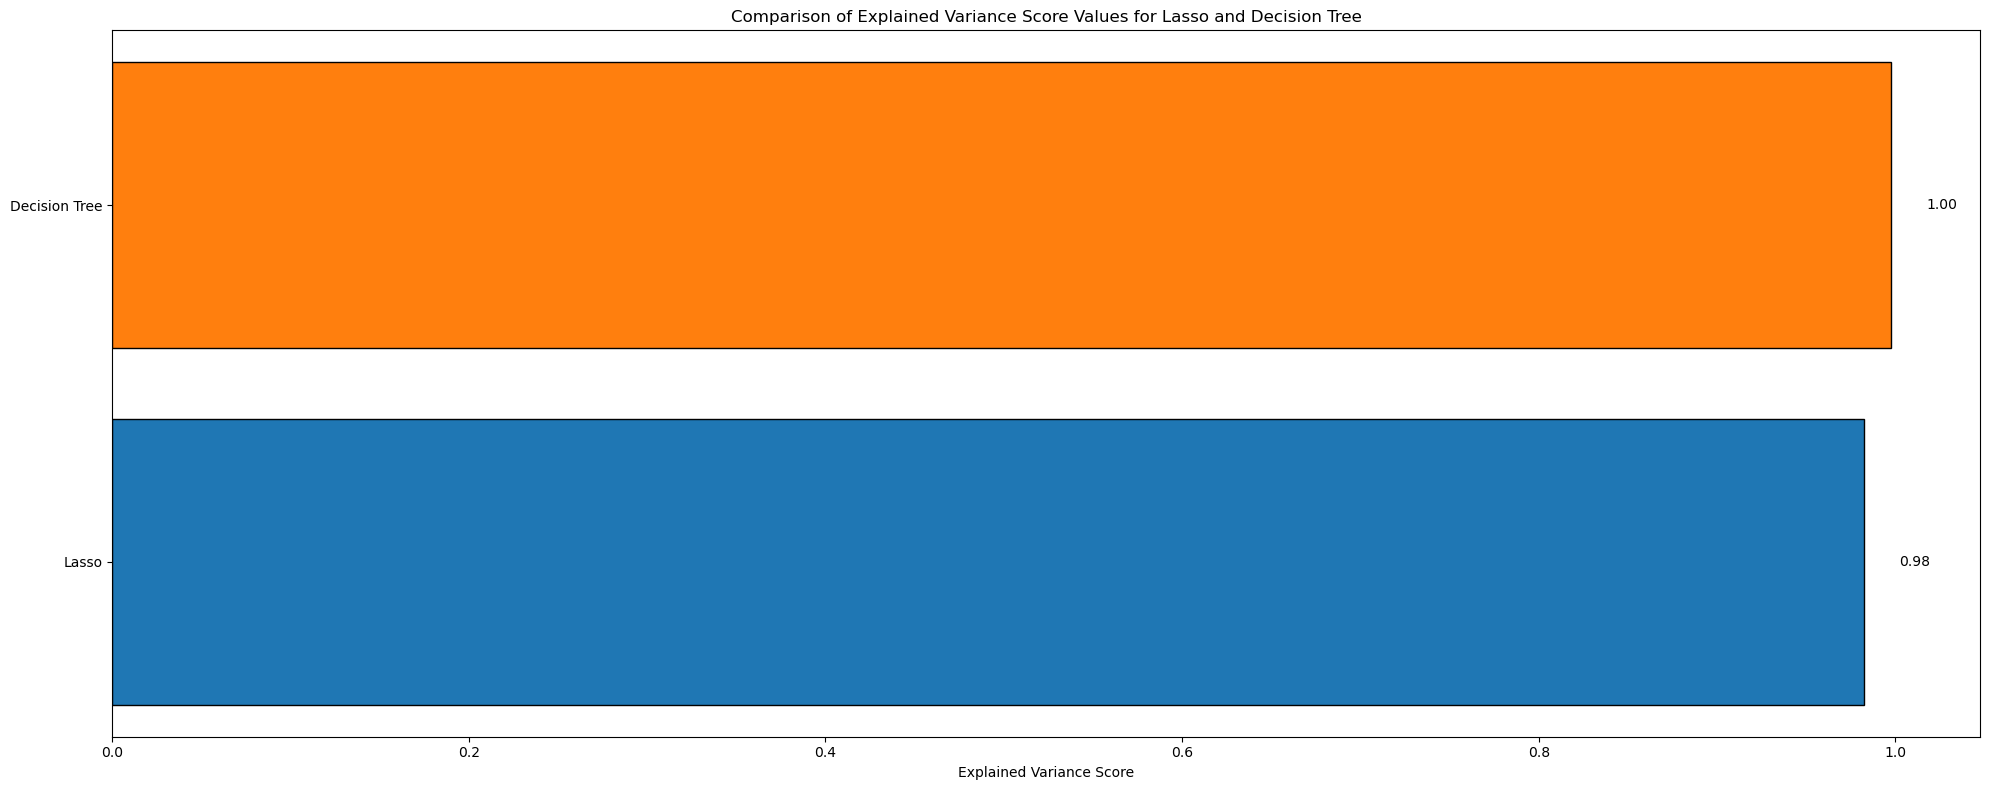

In [59]:
models = ['Lasso', 'Decision Tree']
r2_values = [evs_lasso, evs_tree]

plt.figure(figsize=(20,8))
plt.barh(models, r2_values, color=['#1f77b4', '#ff7f0e'], edgecolor='black')

plt.xlabel('Explained Variance Score')
plt.title('Comparison of Explained Variance Score Values for Lasso and Decision Tree')

for index, value in enumerate(r2_values):
    plt.text(value + 0.02, index, f'{value:.2f}', va='center')

# Show the plot
plt.tight_layout()
plt.show()

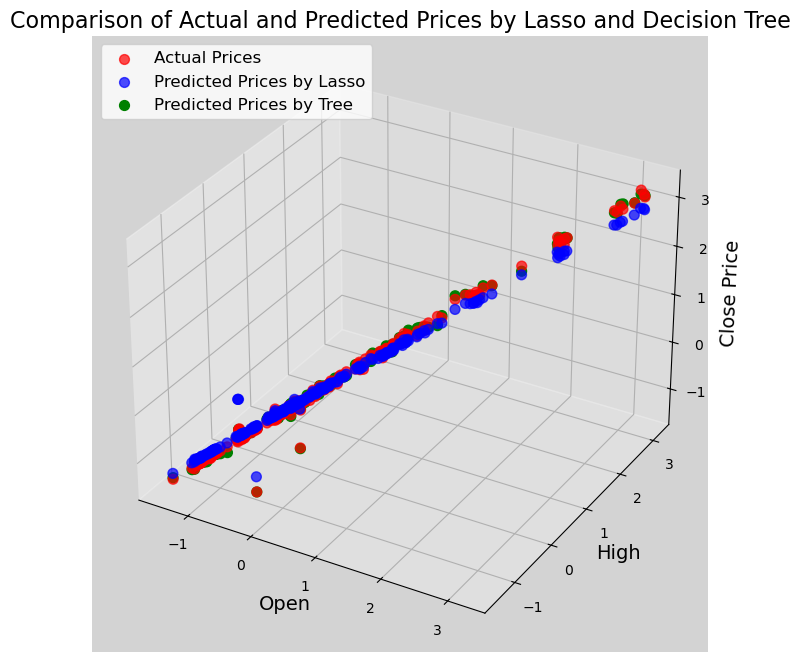

In [51]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D



x_plot = x_test[:, [0, 1, 2]]  

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x_plot[:, 0], x_plot[:, 1], y_test, color='r', label='Actual Prices', alpha=0.7, s=50)

ax.scatter(x_plot[:, 0], x_plot[:, 1], y_predict, color='b', label='Predicted Prices by Lasso', alpha=0.7, s=50)

ax.scatter(x_plot[:, 0], x_plot[:, 1], y_predict_tree, color='g', label='Predicted Prices by Tree', alpha=1, s=50)

ax.set_facecolor('lightgrey')  

ax.set_xlabel('Open', fontsize=14)
ax.set_ylabel('High', fontsize=14)
ax.set_zlabel('Close Price', fontsize=14)

# Title with larger font size
ax.set_title('Comparison of Actual and Predicted Prices by Lasso and Decision Tree', fontsize=16)

# Adjust legend location and font size
ax.legend(loc='upper left', fontsize=12)

# Show the plot
plt.show()


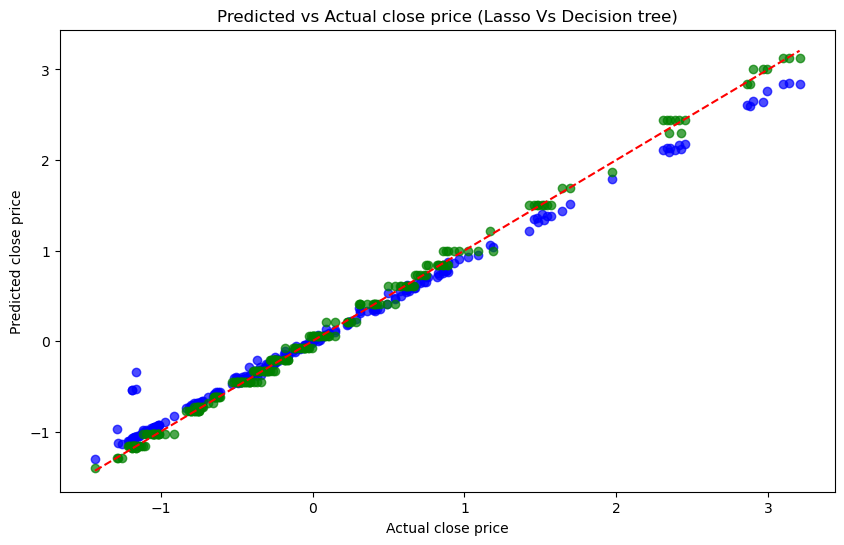

In [53]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_predict, alpha=0.7, color="blue")
plt.scatter(y_test, y_predict_tree, alpha=0.7, color="green")

plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title("Predicted vs Actual close price (Lasso Vs Decision tree)")
plt.xlabel("Actual close price")
plt.ylabel("Predicted close price")
plt.show()

In [67]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

# Assuming 'lasso' and 'reg_tree' are already trained models
new_data = pd.read_csv("unseen_data.csv")

# Feature selection and scaling
new_data_features = new_data[['open', 'high', 'low', 'volume']] 
scaler = StandardScaler()  # Assuming scaler is fitted already
new_data_scaled = scaler.fit_transform(new_data_features)

# Predictions from the models
predictions_scaled_lasso = lasso.predict(new_data_scaled)
predictions_scaled_tree = reg_tree.predict(new_data_scaled)

# Inverse transform to get predictions in the original scale
close_scaler = StandardScaler()  
close_scaler.fit(new_data[['close']])  
predictions_unscaled_lasso = close_scaler.inverse_transform(predictions_scaled_lasso.reshape(-1, 1))
predictions_unscaled_tree = close_scaler.inverse_transform(predictions_scaled_tree.reshape(-1, 1))

# Assigning predictions to new_data
new_data['predicted_close_lasso'] = predictions_unscaled_lasso
new_data['predicted_close_tree'] = predictions_unscaled_tree

# Calculating R² scores
r2_lasso = r2_score(new_data['close'], predictions_unscaled_lasso)
r2_tree = r2_score(new_data['close'], predictions_unscaled_tree)

# Printing R² scores and the predicted close values
print(f"R² score on new data for Lasso: {r2_lasso}")
print(f"R² score on new data for Decision Tree: {r2_tree}")
print(new_data[['date', 'predicted_close_lasso', 'predicted_close_tree']])


R² score on new data for Lasso: 0.9895963566045758
R² score on new data for Decision Tree: 0.8607222566518435
                         date  predicted_close_lasso  predicted_close_tree
0   2021-05-27 00:00:00+00:00            2405.268642           2441.447590
1   2021-05-28 00:00:00+00:00            2397.029581           2441.447590
2   2021-06-01 00:00:00+00:00            2401.880142           2441.447590
3   2021-06-02 00:00:00+00:00            2406.416628           2441.447590
4   2021-06-03 00:00:00+00:00            2377.905210           2441.447590
5   2021-06-04 00:00:00+00:00            2412.731336           2441.447590
6   2021-06-07 00:00:00+00:00            2429.639727           2441.447590
7   2021-06-08 00:00:00+00:00            2453.835493           2441.447590
8   2021-06-09 00:00:00+00:00            2466.361721           2441.447590
9   2021-06-10 00:00:00+00:00            2476.334312           2566.171863
10  2021-06-11 00:00:00+00:00            2484.812999           25

R² score on new data for Lasso: 0.9896
R² score on new data for Decision Tree: 0.8607

Predicted Close Prices Comparison:
                     Date  Actual Close  Predicted Close (Lasso)  Predicted Close (Decision Tree)
2021-05-27 00:00:00+00:00       2402.51              2405.268642                      2441.447590
2021-05-28 00:00:00+00:00       2411.56              2397.029581                      2441.447590
2021-06-01 00:00:00+00:00       2429.81              2401.880142                      2441.447590
2021-06-02 00:00:00+00:00       2421.28              2406.416628                      2441.447590
2021-06-03 00:00:00+00:00       2404.61              2377.905210                      2441.447590
2021-06-04 00:00:00+00:00       2451.76              2412.731336                      2441.447590
2021-06-07 00:00:00+00:00       2466.09              2429.639727                      2441.447590
2021-06-08 00:00:00+00:00       2482.85              2453.835493                      2441.447

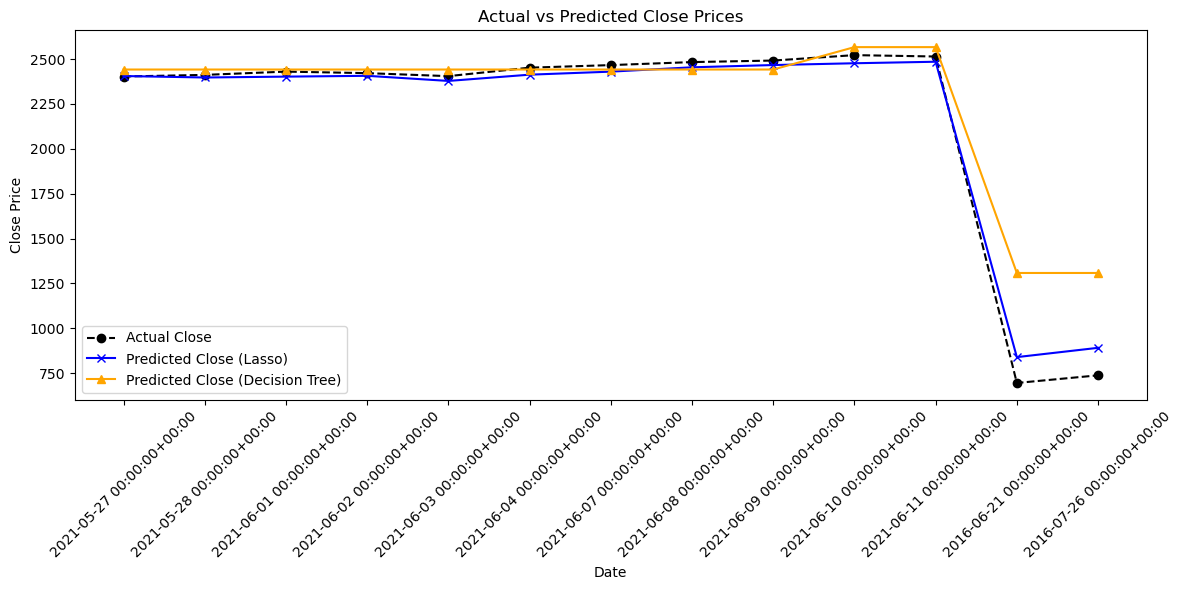

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

# Assuming 'lasso' and 'reg_tree' are already trained models
new_data = pd.read_csv("unseen_data.csv")

# Feature selection and scaling
new_data_features = new_data[['open', 'high', 'low', 'volume']] 
scaler = StandardScaler()  # Assuming scaler is fitted already
new_data_scaled = scaler.fit_transform(new_data_features)

# Predictions from the models
predictions_scaled_lasso = lasso.predict(new_data_scaled)
predictions_scaled_tree = reg_tree.predict(new_data_scaled)

# Inverse transform to get predictions in the original scale
close_scaler = StandardScaler()  
close_scaler.fit(new_data[['close']])  
predictions_unscaled_lasso = close_scaler.inverse_transform(predictions_scaled_lasso.reshape(-1, 1))
predictions_unscaled_tree = close_scaler.inverse_transform(predictions_scaled_tree.reshape(-1, 1))

# Assigning predictions to new_data
new_data['predicted_close_lasso'] = predictions_unscaled_lasso
new_data['predicted_close_tree'] = predictions_unscaled_tree

# Calculating R² scores
r2_lasso = r2_score(new_data['close'], predictions_unscaled_lasso)
r2_tree = r2_score(new_data['close'], predictions_unscaled_tree)

# Create a table to display results
result_table = pd.DataFrame({
    'Date': new_data['date'],
    'Actual Close': new_data['close'],
    'Predicted Close (Lasso)': new_data['predicted_close_lasso'],
    'Predicted Close (Decision Tree)': new_data['predicted_close_tree'],
})

# Print R² scores
print(f"R² score on new data for Lasso: {r2_lasso:.4f}")
print(f"R² score on new data for Decision Tree: {r2_tree:.4f}")

# Display the table
print("\nPredicted Close Prices Comparison:")
print(result_table.to_string(index=False))  # prints the table without row index

# Plotting the comparison
plt.figure(figsize=(12, 6))

# Plot actual vs predicted close values for both models
plt.plot(new_data['date'], new_data['close'], label='Actual Close', color='black', linestyle='--', marker='o')
plt.plot(new_data['date'], new_data['predicted_close_lasso'], label='Predicted Close (Lasso)', color='blue', linestyle='-', marker='x')
plt.plot(new_data['date'], new_data['predicted_close_tree'], label='Predicted Close (Decision Tree)', color='orange', linestyle='-', marker='^')

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Actual vs Predicted Close Prices')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()


Declared a clear overfitting in a decision tree and that is why we need lasso as a regulrization technique for multi-regression model 

In [60]:
new_data['close']

0     2402.51
1     2411.56
2     2429.81
3     2421.28
4     2404.61
5     2451.76
6     2466.09
7     2482.85
8     2491.40
9     2521.60
10    2513.93
11     695.94
12     738.42
Name: close, dtype: float64

In [26]:
import numpy as np
from sklearn.preprocessing import StandardScaler
single_sample = np.array([[702.77,692.01,612,1465634]])  
new_data_scaled = scaler.transform(single_sample)  
predicted_scaled = lasso.predict(new_data_scaled)  
predictions_unscaled = close_scaler.inverse_transform(predicted_scaled.reshape(-1, 1)) 
print(f"Predicted close price for the given sample: {predictions_unscaled[0][0]}")

Predicted close price for the given sample: 837.4836084738988


c:\Users\dell\anaconda3\envs\tensorflow_env\lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

